# Intial variables

In [1]:
import numpy as np
from random import randint
import pickle
from numpy import linalg as LA
from random import randint
from graphics import *
import matplotlib.pylab as plt
import matplotlib.path as mltp
% matplotlib inline
with open('obstacles.pickle', 'rb') as f:  # Python 3: open(..., 'rb')
    s,maxRadius, maxDis, area = pickle.load(f)
from scipy.spatial import ConvexHull


# Position restrictions
The begin position of the drone is restricted to :
<ol>
<li> Stay within the outer boundary of the random obstacles (convex hull) </li>
<li> Does not intersect with the obstacles or their circumference :</li>
$$ D_{1,2}<R_{1} * SF2 $$
Where D is the distance between drone and obstacle, R1 the radius of the obstacle, and SF2 a safety factor (margin = 1.5)
<li> Area within which it must remain, same as obstacles </li>
</ol>
# Heading:
Anti-clockwise positive direction $\psi = [0,2 \pi ]$

# Velocity
Velocity is normalized, given the velocity amplitude does not influence the decision of the new heading (voronoi only dependent on obstacles and position for now). This way, theoretically the network should learn faster. 
$$v = [-v_{max},v_{max} ]$$

In [2]:
# Set boundaries velocity and heading
maxVel = 20
maxHeading = np.pi*2
SF2 = 1 # safety factor



In [3]:
# Randomize velocity and heading
velocity = [randint(-maxVel, maxVel),randint(-maxVel,maxVel),0]
velocity = np.divide(velocity, LA.norm(velocity))
heading = np.random.sample(1)*maxHeading



In [4]:
# COnvex hull of points 
s1 =np.array(s)
s1 = s1[:,0:2]
hull = ConvexHull(s1)
path =  mltp.Path(s1[hull.vertices])

In [5]:
# Randomize position, check whether it lies within convex hull of obstacles, and whether it does not
#intersect with objects

stopPos = False
while stopPos == False:
    intersect = True
    pos = np.array([randint(0,area),randint(0,area),0])
    if path.contains_point(pos) ==True:
        #print(pos, 'True')
        for num in s:                
            if LA.norm([num[0:2] -pos[0:2]])< (num[3]+SF2) and intersect== True:
                position = pos
                intersect = False
                #print(num, intersect)
        if intersect == True:
            position = pos
            stopPos = True



In [6]:
# Saving the objects:
with open('initialVariables.pickle', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([position, velocity, heading], f)


# Sanity check 

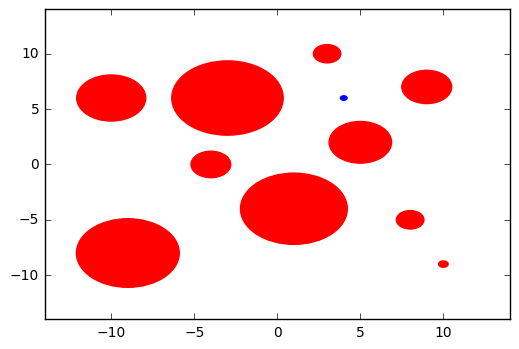

In [7]:

fig, ax = plt.subplots()
limits = maxRadius + maxDis
ax.set_xlim((-limits, limits))
ax.set_ylim((-limits, limits))
for c in s:
    #print(c)
    point =(c[0],c[1])
    circle = plt.Circle(point, c[3], color='r')
    ax.add_artist(circle)
 
circle = plt.Circle((position[0],position[1]), 0.2, color='b')
ax.add_artist(circle)  
